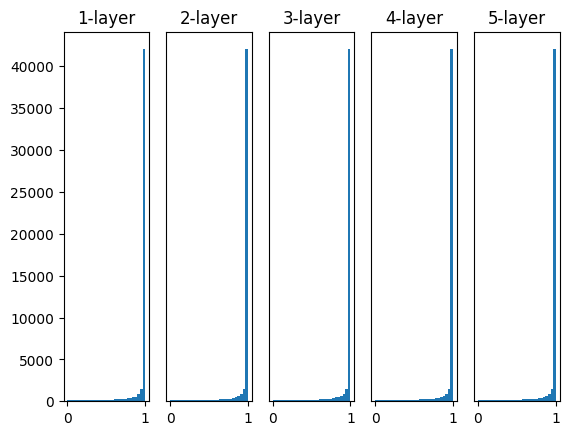

In [3]:
# coding: utf-8


import numpy as np
import matplotlib.pyplot as plt


#활성화 함수를 작성 
#sigmoid = 0~1사이로 값을 변환
#Relu = 0보다 작으면 0, 0보다 크면 그대로 사용
#tahn ? = -1 ~1 (표준편차?) 사이로 값을 변환
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


#1000명의 사람, 100가지 특징
#히든층의 노드 수는 100개씩
#히든층 5개 (건물이 5층)
#활성화한 결수 = 각 층을 통과한 결과를 차례대로 저장할 dictionary

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data #입력 값

#1층 ~ 5층 값 차례대로 for 문에 넣어서 입력
#층별 값은 이전값을 입력해서 산출된 값 b1 b2 b3 b4...이런식으로 층을 이동하니까
# x 입력값은 = activations[i-1] activation 한 전층 값을 넣은 거

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자! 표준편차 1 -> 0.01 -> 
    w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
      # --> 'Xavier 초기값' (시그모이드/tanh 짝꿍)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
      # --> 'He 초기값' (ReLU 짝꿍)

    #신호를 그래서 어떻게 전달한다? 입력값이랑 가중값 행렬곱
    a = np.dot(x, w)

    #이제 이 신호전달 a 값을 각각의 활성화 합수에 적용해서 실혐
    # 활성화 함수도 바꿔가며 실험해보자!
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    #plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


## 가중치 초기값 설정

 - 실습자료에서는 가중치 초기값 시작값이 5층까지 전달되면서 신호가 0으로 몰리거나, 1으로 몰리는 현상을 보임

 - 실제 학습속도에 영향을 주는 숫자 = 손실값을 비교하는 거는 compare 자료에서 확인

 